# Exercise 4 - Discrete Fourier Analysis and Synthesis of Signals

## Objectives
- To learn that any periodic signal can be constructed using a linear combination of sinusoidal waves
- To introduce the Discrete Fourier Transform (DFT)
- To understand the difference between amplitude and phase in the frequency-domain 



In [2]:
import os
os.makedirs('results/ex4', exist_ok=True)

## Lab Exercise

### Sinusoidal Signals
We have seen how Python can manipulate data stored as a $1\times128$ vector. Now let us create a matrix `S` containing 10 rows of sine waves such that the first row is frequency $f$, the second row is the second harmonic $2f$ and so on. In this case, `Nsamp` = 128, `fsig` = 1000 and `fsamp` = 25600.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen
from functions.lab_functions import cosgen

fs = 8000
fsig = 150
Nsamp = 100


S = []
for i in np.arange(0, 10):
    t, x = sinegen(fs, (i+1)*fsig, Nsamp)
    S.append(x)

Next, let us explore what happens when we add all the harmonics together. This can be done by first creating a row vector `p` containing 'ones', and then multiplying this with the matrix `S`:

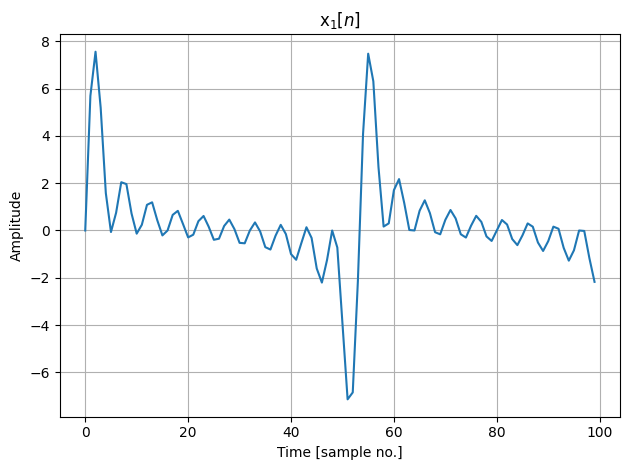

In [4]:
from functions.lab_functions import plot_signal

p = np.ones(10)
x1 = p.dot(S)

# for i in range(len(S)):
#     plt = plot_signal(S[i])

plt = plot_signal(x1, title='x$_1[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

>**GTA Tip**:
>
>The `np.dot(a, b)` command performs the dot product of two arrays. 

This is equivalent to calculating:
$$x_1[n]=\sum_{k=1}^{10}\sin(k \Omega n),$$

where $\Omega=2\pi\frac{f}{f_s}$ is the normalised angular fundamental frequency and $n=\{0,\:1,\:2,\cdots,\:\text{Nsamp}-1\}$.




**Question 4.1**: Explain the result $x_1[n]$.




> We have a graph with the same period as the first harmonic but has peaks at the same frequencies as the tenth harmonic. This is due to the summation.
We have a odd function

Instead of using a unity row vector, we could choose a different weight $b[k]$ for each harmonic component in the summation:
$$x_2[n]=\sum_{k=1}^{10}b[k]\sin(k \Omega n).$$

**Question 4.2** Try $b[k] = \big[1,\: 0,\: 1/3,\: 0,\: 1/5,\: 0,\: 1/7,\: 0,\: 1/9,\: 0\big]$ and observe what we get.

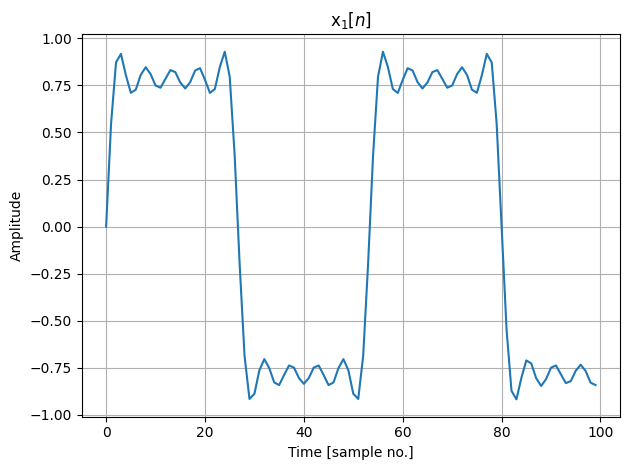

In [5]:
b = np.array([1, 0, 1/3, 0, 1/5, 0, 1/7, 0, 1/9, 0])

x1 = b.dot(S)

plt = plot_signal(x1, title='x$_1[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.3** Let us see what we get for $x_2[n]$ with $b[k] = \big[1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\big]$.

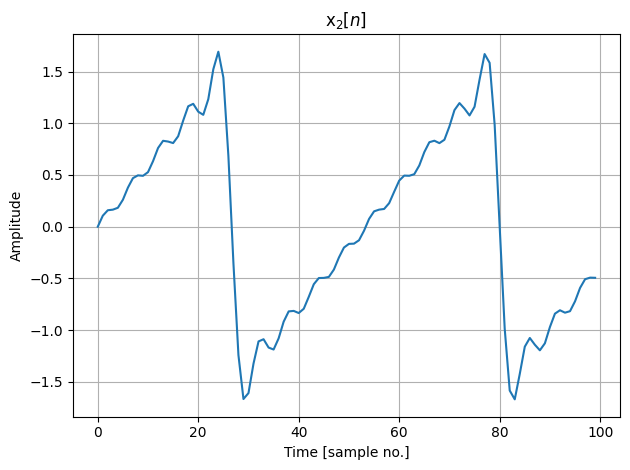

In [6]:
b = np.array([1, -1/2, 1/3, -1/4, 1/5, -1/6, 1/7, -1/8, 1/9, 0])

x2 = b.dot(S)

plt = plot_signal(x2, title='x$_2[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.4 (Optional)**: You may want to derive the results for $x_2[n]$ with $b[k] = \big[1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\big]$ from first principles.


So far, we have used sine waves as basis functions. Let us now try using cosine signals. First, create a `cosgen` function and use it to generate a $10\times 128$ matrix `C` with 10 harmonically-related cosine waveforms. 


**Question 4.5** Now, use the weight vector $a[k] = \big[1,\: 0,\: -1/3,\: 0,\: 1/5,\: 0,\:  -1/7,\: 0,\: 1/9,\: 0\big]$, to compute `x3=ak*C` and plot the result of:
$$x_3[n]=\sum_{k=1}^{10}a[k]\cos(k \Omega n).$$

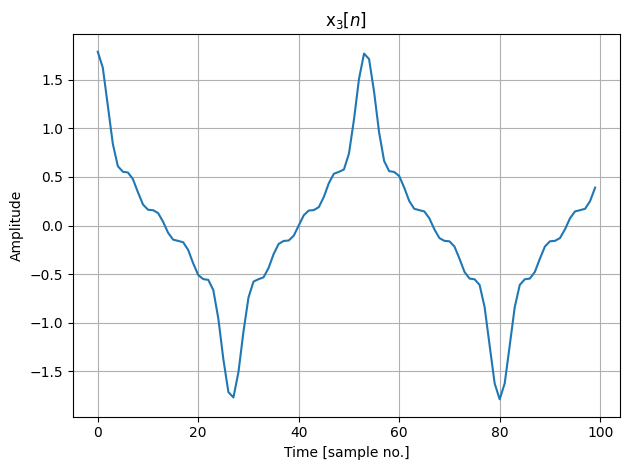

In [7]:
C = []
for i in np.arange(0, 10):
    t, x = cosgen(fs, (i+1)*fsig, Nsamp)
    C.append(x)

a = np.array([1, 0, 1/3, 0, 1/5, 0, 1/7, 0, 1/9, 0])

x3 = a.dot(C)

plt = plot_signal(x3, title='x$_3[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()


**Question 4.6**: How does $x_3[n]$ differ from $x_2[n]$ obtained earlier using sine waves? What general conclusions on the even and odd symmetry of the signal can you draw?

> This shows that if you have the summation of cosine waves you will get an even function, whereas if you take the summation of sine waves you will get an odd function. Therfore if you have a function that has both odd and even components, then it can be represented by the summation of both cosine and sine waves.



**Question 4.7 (Optional)**:  Prove that $x[n]=a[0] + \sum^{\infty}_{k=1}a[k]\cos(\frac{2\pi}{N}kn) + \sum^{\infty}_{k=1}b[k]\sin(\frac{2\pi}{N}kn)$ is equivalent to $x[n]=\sum^{\infty}_{k=-\infty}A[k]e^{j\frac{2\pi}{N}kn}$. How can the coefficients $A[k]$ be determined? 

>**GTA Tip**
>
>Recall that $\sin(\theta) = -\frac{1}{2}je^{j\theta} + \frac{1}{2}je^{-j\theta}$ and $\cos(\theta) = \frac{1}{2}e^{j\theta}+ \frac{1}{2}e^{-j\theta}$.

We observe a really important property of periodic signals using Fourier series analysis. Fourier series analysis states that any periodic function can be constructed using a weighted sum of harmonically-related sinusoids. This leads to the definition of the Discrete Fourier Series (DFS) for periodic signals:

---
**DFS (Discrete Fourier Series)**:
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0,\pm1,\pm2,\cdots$$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0,\pm1,\pm2,\cdots$$

---

You should now be able to see that it is possible to construct $x[n]$ from a finite number of harmonics; the frequencies are $\Omega=\frac{2\pi}{N}k,$ where $k = 0, 1,\cdots,N-1$.

**Question 4.8**:  Derive the DFS of the periodic sequence  $x[n] = \{\cdots, \stackrel{\text{n=0}}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3},\cdots\}$, where $N=4$ and the '$n=0$' denotes the $0^{\text{th}}$ sample. What do you notice about the periodicity of $X[k]$? 

> $X[k] = 0 + e^{-jk\frac{\pi}{2}} + 2e^{-jk\pi} + 3e^{-jk\frac{3\pi}{2}} $ 

It should be evident that $X[k]$ is itself a (complex-valued) periodic sequence with a fundamental period equal to $N$, that is,

$$X[k+N]=X[k],$$

where $k$ is the harmonic or frequency bin index and $n$ is the sample index.

Recall that to perform the frequency analysis of a periodic signal, we take one cycle and perform the DFS. So what about non-periodic signals? If an infinitely long continuous-time domain signal is sampled, the frequency-domain representation is given by what is called the Discrete-Time Fourier Transform (DTFT). This is defined as $X(e^{j\Omega})=\sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\Omega n}$ and gives a continuous frequency-domain representation. 

However, it is not possible in practice to process an infinite number of samples. Therefore, we only take and analyse the frequency contents of a finite number of samples $N$ in practice. This leads to the Discrete Fourier Transform (DFT). The DFT is related to the DTFT via frequency-domain sampling at discrete frequencies $2\pi k/N$, $k = 0,1,\cdots N-1$ of the DTFT spectrum $X(e^{j\Omega})$, where $\Omega$ is the frequency-domain variable.

The equations for the Discrete Fourier Series (DFS) and the Discrete Fourier Transform (DFT) are surprisingly the same but the reasoning behind the periodicity is not. In the DFS, the time sequence is 'naturally' periodic whereas the periodicity of the DFT is enforced by frequency-domain sampling of $X(e^{j\Omega})$ (<em>recall Exercise 3 and the effects of sampling</em>). The full mathematical definition of the DFT is:

---
**DFT (Discrete Fourier Transform)**: $x[n] \rightarrow X[k]$
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0, 1, 2,\cdots N-1 $$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0, 1, 2,\cdots N-1 $$

---

**Question 4.9**: Can the Fourier transform modify the energy of a signal?

> No the Fourier Transform of a signal cannot modify the energy of a signal because Parseval's Theorem states that the energy in a time domain signal equals the energy in the frequency domain representation, normalized by $ 1/2\pi. $ 

**Question 4.10**: When applying Fourier analysis to a signal, under which circumstances should a DFS be employed and under which circumstances should a DFT be employed?

>**GTA Tip**
>
> In Python we use the `fft` function to calculate the DFT. The Fast Fourier Transform (FFT) is just a fast algorithm that is used to calculate the DFT. 

>  **4.10**: If we have a periodic signal then we use DTFS (DFT is the same as DTFS) and we would use DTFT if we have a non-periodic signal.
>
> DFS is used for periodic signals. DFT is used for non-periodic signals but enforces a period onto the signal. This therfore makes 

Now let us find the DFT spectrum of the sine wave produced by running the following code:

In [8]:
from scipy.fft import fft

t, x_sin = sinegen(8000,1000,8)
A = fft(x_sin)

Let us plot the results:

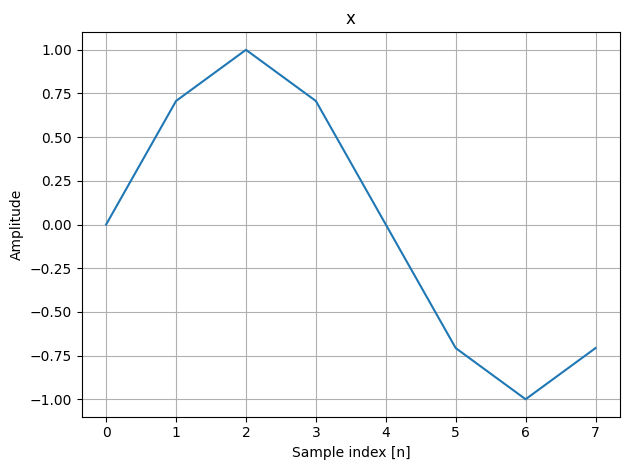

A: 
-0j
(-0-4j)
-0j
0j
-0j
-0j
0j
(-0+4j)


In [9]:
plt = plot_signal(x_sin, title='x', xlabel='Sample index [n]', ylabel='Amplitude')
plt.show()

print('A: ')
for i in A:
    print(np.round(i,1), end = '\n')

**Question 4.11**: Explain the numerical result in `A`. Make sure that you know the significance of each number in the output. Evaluate the DFT of a cosine signal. Is it what you would expect?



> A represents the values of the frequency domain points.

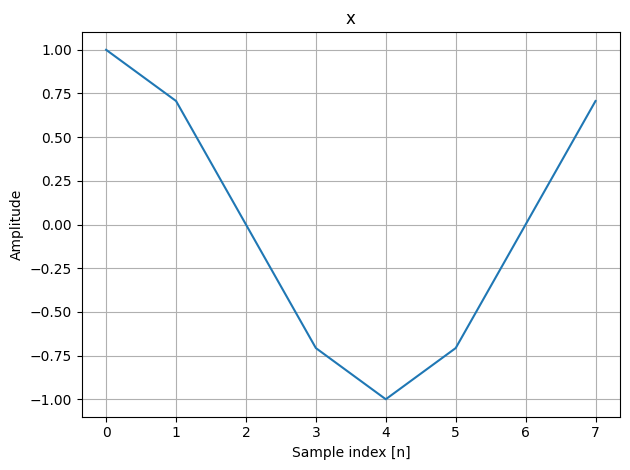

A1: 
(-0-0j)
(4-0j)
-0j
-0j
-0j
0j
0j
(4+0j)


In [10]:
t, x_cos = cosgen(8000,1000,8)
A1 = fft(x_cos)

plt = plot_signal(x_cos, title='x', xlabel='Sample index [n]', ylabel='Amplitude')
plt.show()

print('A1: ')
for i in A1:
    print(np.round(i,1), end = '\n')

from functions.lab_functions import plot_spec

**Question 4.12**: What is the frequency resolution, $\Delta F$, of a 256-point DFT when the sampling frequency is 1000 Hz?

>**GTA Tip**
>
>- The first sample of the DFT represents the DC component (0 Hz). 
>- The last sample  of the DFT represents the sampling frequency minus the frequency resolution ($f_s - \Delta F$).


> **4.12**: $\Delta F = \frac{1000}{256} = 3.91 $ 

Instead of working with real and imaginary numbers of a complex number $A=b+jc$, where $b,c$ are real scalars and $j=\sqrt{-1}$, it is often more convenient to work with the magnitude and phase of the frequency components, as defined by:

>Magnitude, $|A|=\sqrt{b^2+c^2}$ and phase, $\angle{A}=\tan^{-1}\frac{c}{b}$.

We also define a `plot_spec(A)` function which plots the magnitude and phase spectra of `A`.

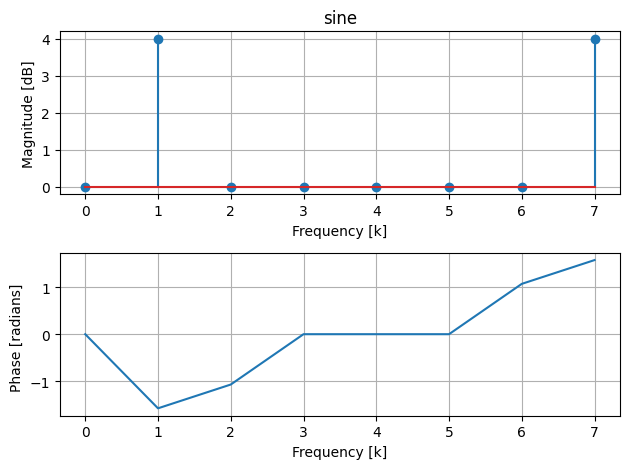

In [11]:
from functions.lab_functions import plot_spec

plt = plot_spec(A, title='sine', func='stem')
plt.show()

>We have peak at 1000Hz as this is the frequency of the sine wave. We have another peak 7000Hz which is the first peak reflected at the Nyquist frequency which is 4000Hz in this case.
>
>If we were to extend the axis, we would have another peak at -1000Hz, reflected at 0Hz. This is applying the knoweledge from sampling.
>
>The phase is a bit random but the main thing to note is that at 1000Hz, it is around 1.5 which is $\pi$/2. This is because the A values at the peaks are completely imaginary which is expected as $e^{ix} = cos(x) + isin(X). $
The values of A were -4j and +4j which will result in phases $\pi/2$ and $-\pi/2$ respectively.

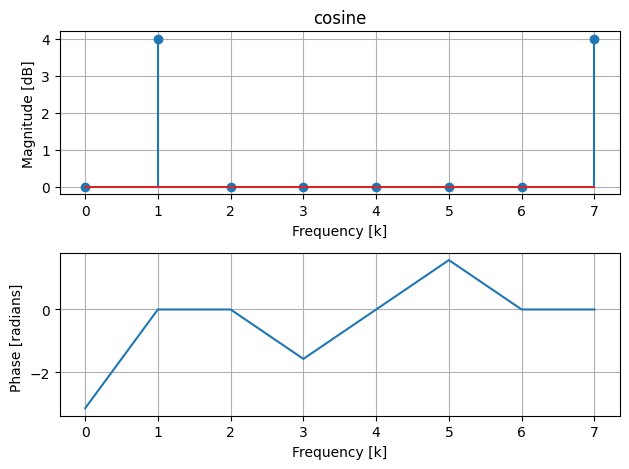

In [12]:
plt = plot_spec(A1, title='cosine', func='stem')
plt.show()

> As you can see with the cosine graph, the maagnitude of the frequency domain is the same as the sine wave which is expected as it's the same frequency.
>
>However the phase at the peaks is zero. This is because the values of A at the peaks are real, therefore the phase is zero.

### Dirac Delta and Rectangular Signals

Now, create a pulse signal with 8 samples of ones and 8 samples of zeros. Obtain its magnitude spectrum and verify that it is what you expect. 

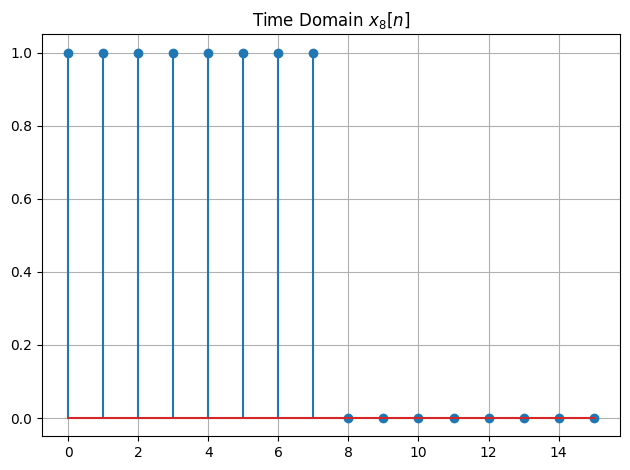

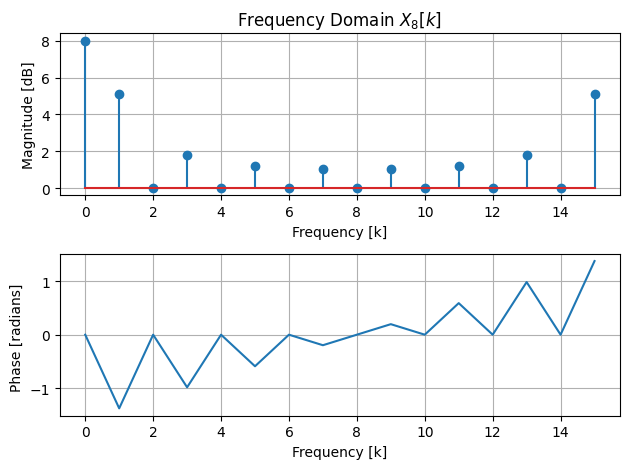

In [13]:
pulse_of_ones = np.ones(8) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(8)

x8 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x8, title='Time Domain $x_8[n]$', func='stem')
plt.show()

X8 = fft(x8)
plt = plot_spec(X8, title='Frequency Domain $X_8[k]$', func='stem')
plt.show()

Gradually reduce the width of the pulse until it becomes a unit impulse function, i.e. contains only a single one and 15 zeros. Observe the changes in the spectrum and make sure you can explain. 

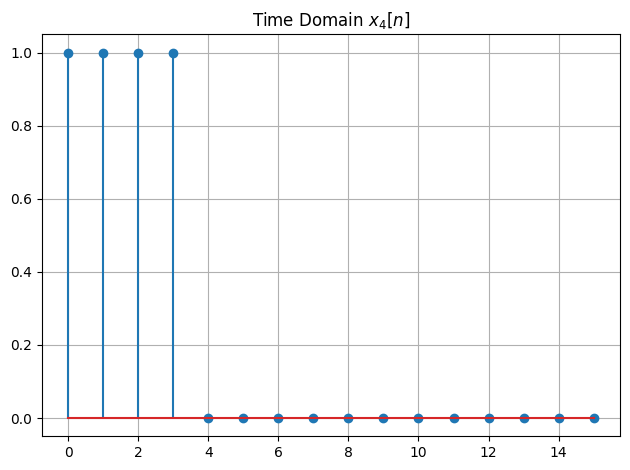

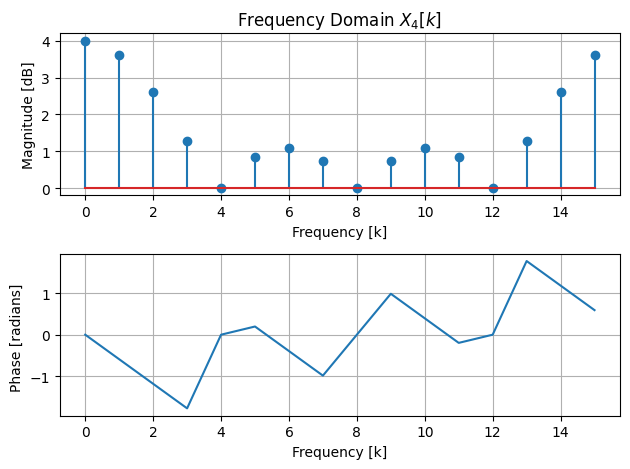

In [14]:
pulse_of_ones = np.ones(4) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(12)

x4 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x4, title='Time Domain $x_4[n]$', func='stem')
plt.show()

X4 = fft(x4)
plt = plot_spec(X4, title='Frequency Domain $X_4[k]$', func='stem')
plt.show()

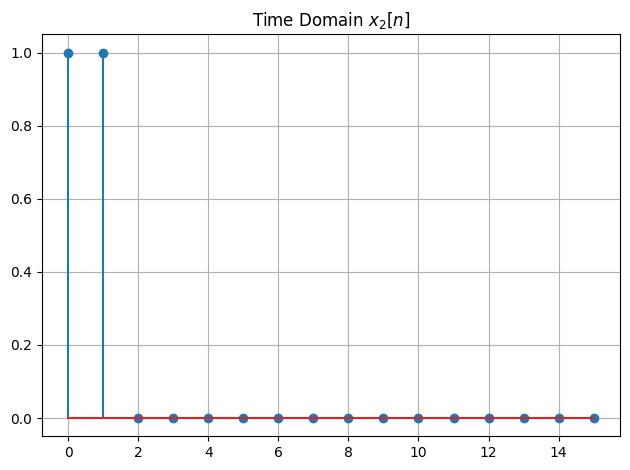

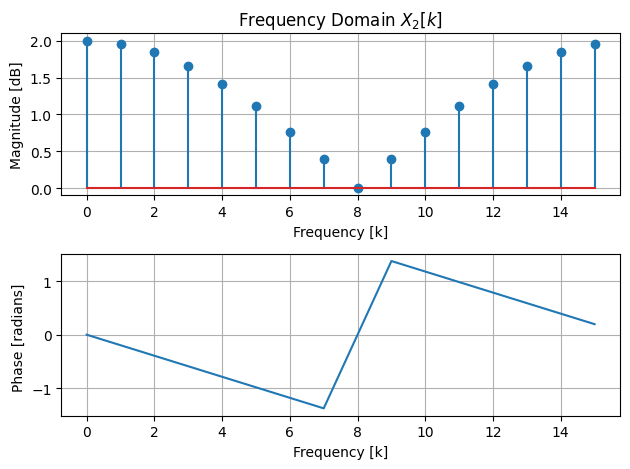

In [15]:
pulse_of_ones = np.ones(2) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(14)

x2 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x2, title='Time Domain $x_2[n]$', func='stem')
plt.show()

X2 = fft(x2)
plt = plot_spec(X2, title='Frequency Domain $X_2[k]$', func='stem')
plt.show()

**Question 4.13**: What do these plots tell us about the frequency components that make up a unit impulse function?

Next, delay this unit impulse function by 1 sample and find its spectrum again. Examine the real and imaginary spectra. 

> **4.13**: The fourier transform of the the rectangular function is the sinc function. As the rectangular function's width is slowly decreased to make it into a unit impulse function, in the frequency domain, the sinc funtion gets stretched out more and more.
>
><ins>Note:</ins>
> The frequency domian appears to be reflected about the 8th sample. I'm too sure why but I would assume it's the same reason as before and it's to do with the sampling frequency.

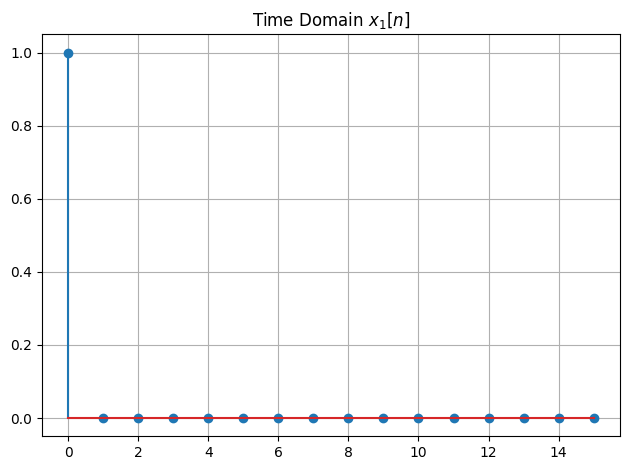

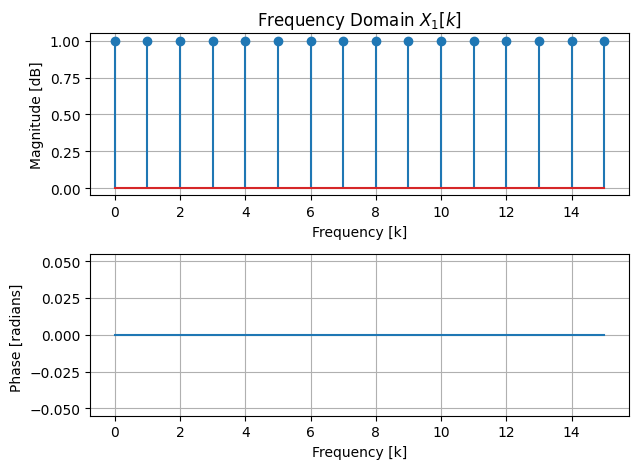

In [16]:
pulse_of_ones = np.ones(1) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(15)

x1 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x1, title='Time Domain $x_1[n]$', func='stem')
plt.show()

X1 = fft(x1)
plt = plot_spec(X1, title='Frequency Domain $X_1[k]$', func='stem')
plt.show()

> When the width of the rectangular function is descreased to a singularity at 0 becoming the unit impulse function, we get a horizontal line in the frequency domain. This is because as the width of the rectangular function goes to zero, the width of the sinc function goes to infinity becoming a horizontal line with magnitude 1.
>
>In terms of energy conservation, the impulse response has infinite energy since it's a power signal. This is also shown in the frequency domain as the area under the graph would be infinity for the whole frequency axis

**Question 4.14**: What happens to the spectrum when the unit impulse function is delayed? What do you expect if you delay the impulse by 2 samples instead of 1? Investigate the phase of the delay (you may find the `np.unwrap` function useful).

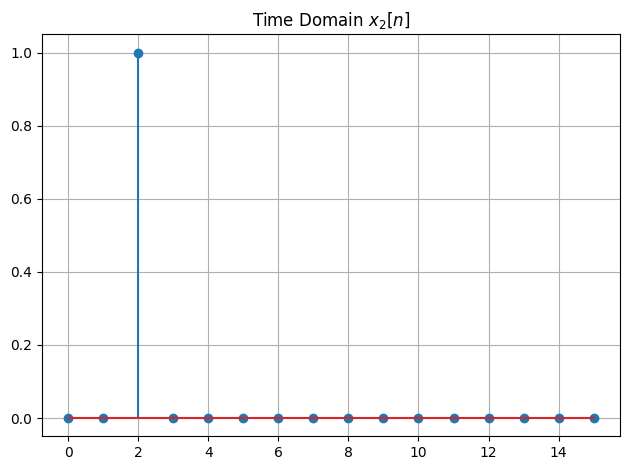

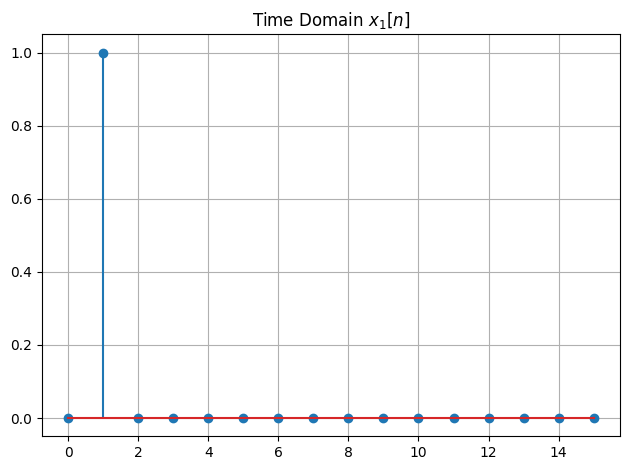

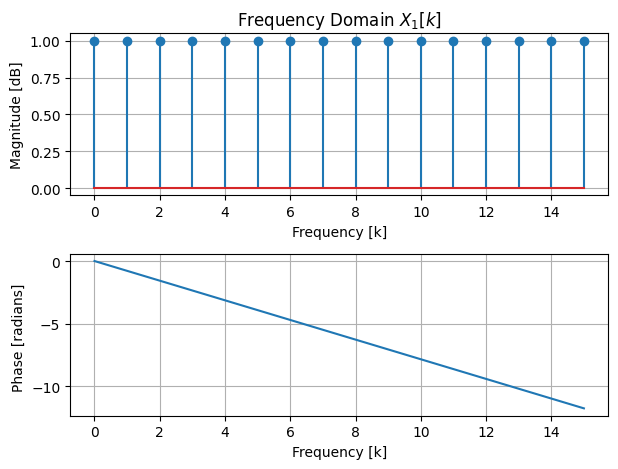

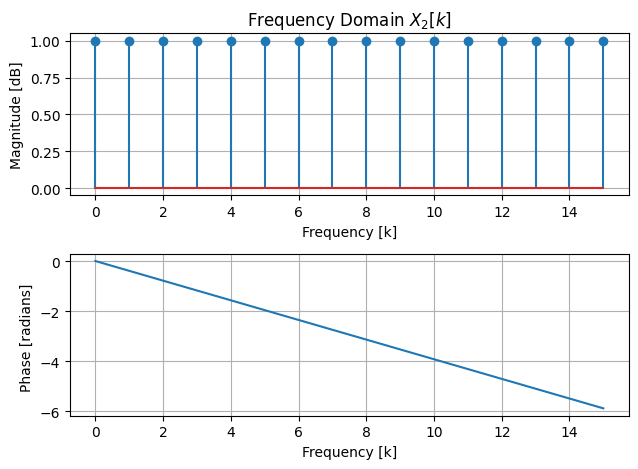

In [53]:
shifted_x1 = np.roll(x1,2)
plt = plot_signal(shifted_x1, title='Time Domain $x_2[n]$', func='stem')
plt.show()

shifted_x2 = np.roll(x1,1)
plt = plot_signal(shifted_x2, title='Time Domain $x_1[n]$', func='stem')
plt.show()

SHIFTED_X1 = fft(shifted_x1)
SHIFTED_X2 = fft(shifted_x2)
plt = plot_spec(SHIFTED_X1, title='Frequency Domain $X_1[k]$', func='stem')
plt = plot_spec(SHIFTED_X2, title='Frequency Domain $X_2[k]$', func='stem')
plt.show()

> As you can see there is no change to the magnitude responce as you are simply multiplying the signal by $ e^{-jwt_0}$ in the frequency domain, which has a magnitude of 1.
>
>However there is a change in the phase as the phase spectrum computes the shift of each component. To calculate the shift use $tan^{-1}(\frac{b}{a})$ formula

### Real World Example: ECG Signals

To test how much you have understood so far, you are given a real electrocardiogram (EGC) signal. The signal contains 500 data samples and sampled at a rate of 200 Hz. Our aim is to detect the heart rate of the patient from which this ECG was taken.

We first load the data into a vector using the Python command:

In [17]:
from functions.lab_functions import load

ecg = load('files/ecg.mat', 'ecg')

Then, plot the ECG signal:

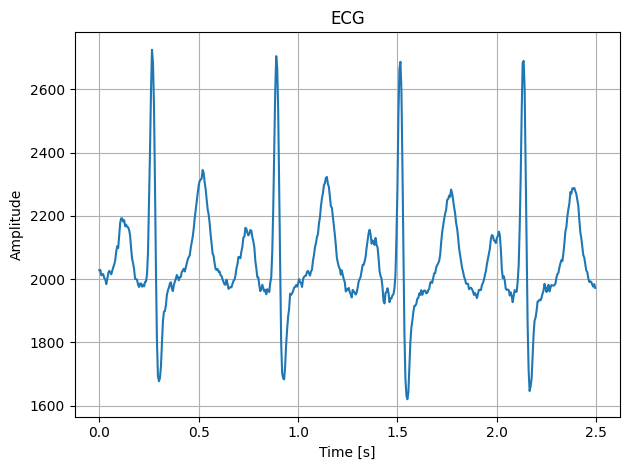

In [28]:
fsamp = 200
Nsamp = len(ecg)
Tsamp = 1/fsamp
t = np.arange(0, Nsamp*Tsamp, Tsamp)
      
plt = plot_signal(t, ecg, title='ECG', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

Now remove the DC component from the ECG signal by processing in the frequency-domain:

In [29]:
from scipy.fft import ifft

ECG = fft(ecg)
ECG[0] = 0 # remove the 0 Hz component 
ecg_no_dc = np.real(ifft(ECG))

**Question 4.15**: Can you think of a way of removing the DC component in the time domain without using the DFT? Try implementing this time-domain approach in Python.

In [30]:
no_dc = ecg - np.mean(ecg)

Let us plot the ECG signal with no DC offset:

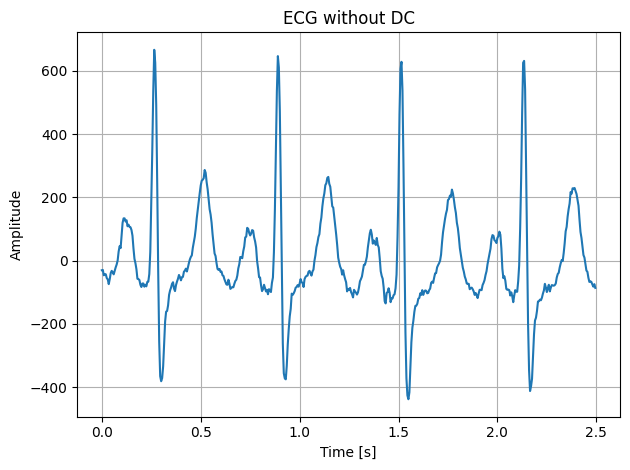

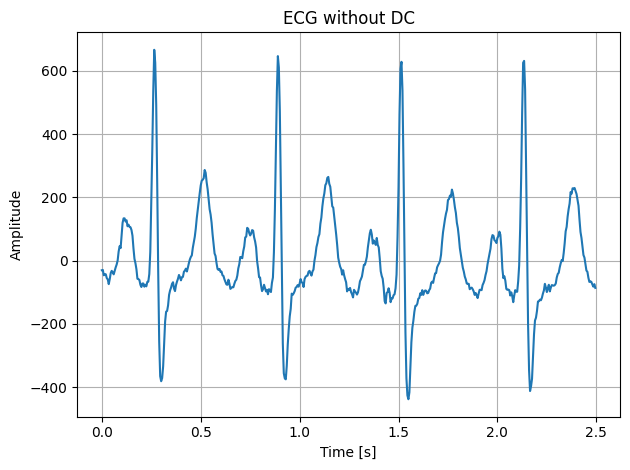

In [32]:
plt = plot_signal(t, ecg_no_dc, title='ECG without DC', xlabel='Time [s]', ylabel='Amplitude')
plt = plot_signal(t, no_dc, title='ECG without DC', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 4.16**: Plot the spectra of the `ecg_no_dc` signal using the cell below. Make sure that you can interpret the frequency axis. Deduce the the person's heart rate in beats per minute. Does this result make sense when compared to your plot of `ecg_no_dc` in the time domain?

>**GTA Tip**
> A normal resting heart rate for adults ranges from 50 to 100 beats per minute.

Peaks: 
0.4
1.6
3.2
4.8
6.4
8.0
9.6
11.2
12.8
14.4
16.0
17.6
19.2


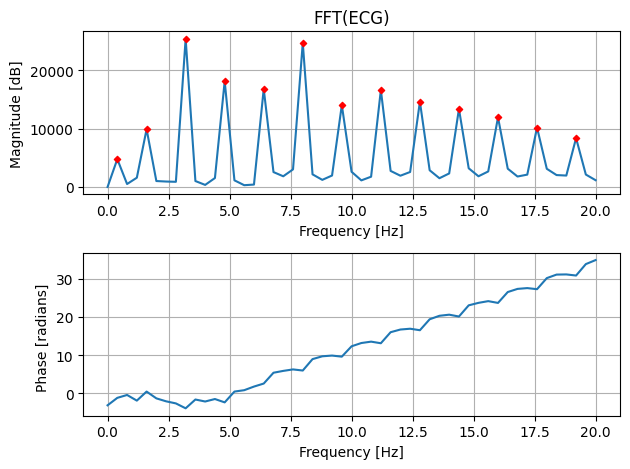

In [54]:
from functions.lab_functions import plot_spec_peaks

f_step = np.arange(0, fsamp, (fsamp/Nsamp))
y = fft(ecg_no_dc)

# Limit spectrum (zoom-in to the range)
f_max = 20 # Set the upper limit of the spectrum to 20 Hz
f_max_idx = np.argmax(f_step>f_max)
y = y[0:f_max_idx]
f_step = f_step[0:f_max_idx]

plt = plot_spec_peaks(f_step, y, title='FFT(ECG)')
plt.savefig('results/ex4/ex4_ecg.pdf')
plt.show()

>**GTA Tip**
>
>- The ECG signal is quasi-periodic and within each period, the heart cycles through both systole and diastole phases. In the frequency domain, you will not just see the heart rate, but also a series of successively higher frequencies called 'harmonic frequencies'. Therefore, to calculate the frequency of the heart, you first need to detect the multiple peaks generated in the frequency domain which will all be multiples of the fundamental frequency, $F_0$ (i.e. $1^\text{st}$ peak = $F_0$; $2^\text{nd}$ peak = $2\times F_0$;  $3^\text{rd}$ peak = $3\times F_0$; and so on). 
>
>
>- Note that the whole ECG signal contains 4 cycles in total, thus leading to a peak at $F_0/4$ due to time-periodicity of the entire signal caused by sampling in the frequency domain.

> **4.16** THe fundamental frequency is the frequency which all the other frequencies are a multiple of. In this case that would be 1.6. The peak at 0.4 is caused by us having for cycles of the signal.
>
> $ F_o = 1.6Hz$
>
>$T_o = 0.625$
>
> $BPM = 37.5 $ 

> **Note:** The fundamental frequency is not the largest peak.

# More Real-World Examples

### Unknown Signal
To test how much you have understood so far, you are given an unknown signal, `unknown.mat`. The file contains 1000 data samples. It is also known that the signal was sampled at 1 kHz and contains one or more significant sine waves.  

You can load the data into a vector using the Python command:

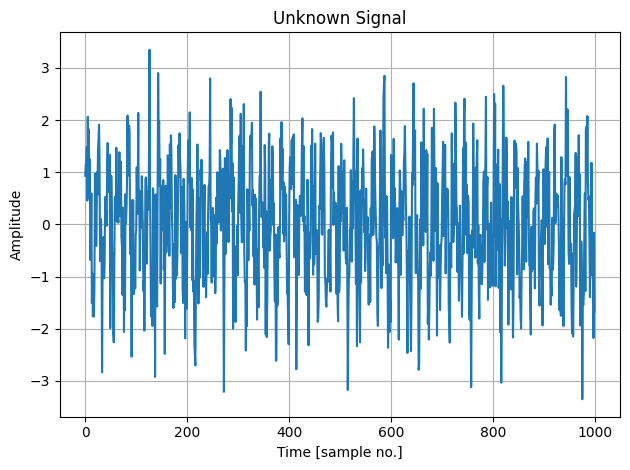

In [23]:
from functions.lab_functions import load
import IPython.display as ipd

unknown = load('files/unknown.mat', 'unknown')
plot_signal(unknown, title='Unknown Signal', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 4.17**: Take at least two different segments. Each segment contains 256 samples of data, starting at different chosen starting sample indices, and compare their magnitude and phase spectra. Are they essentially the same? Make sure that you can interpret the frequency axis. Deduce the frequency and magnitude of its constituent sine waves. 

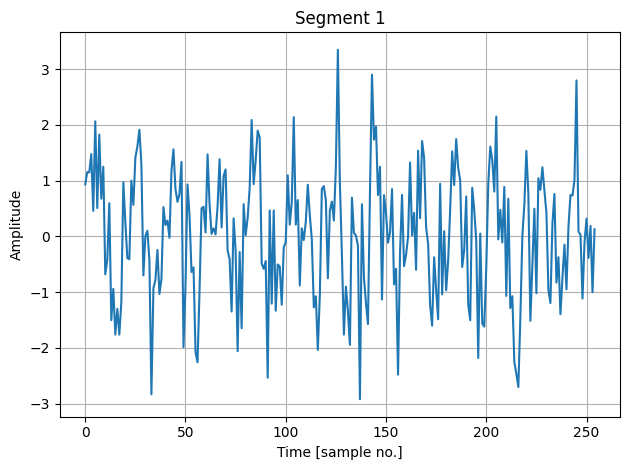

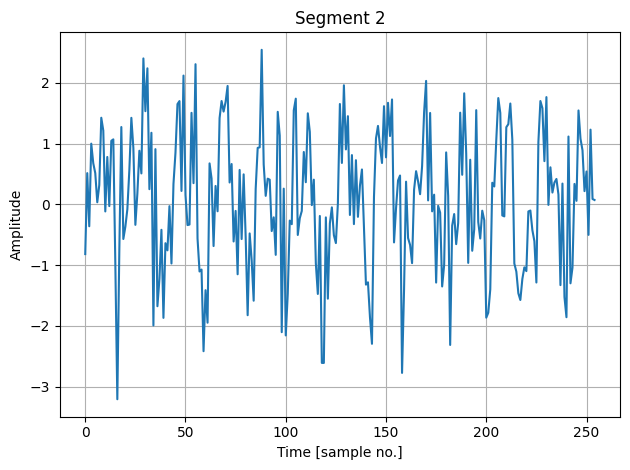

3.346058262958537


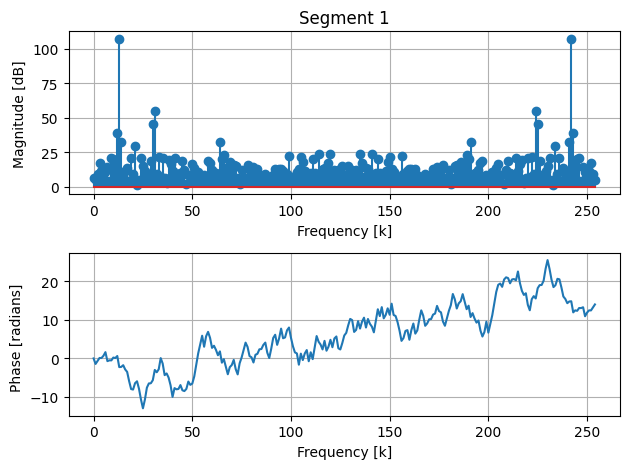

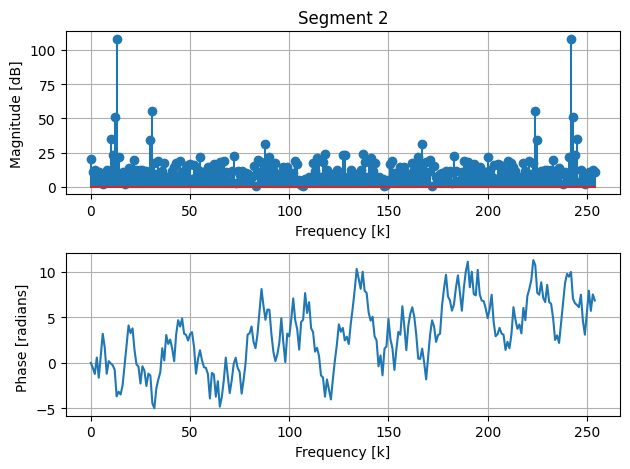

In [60]:
segment1 = unknown[0:255]
segment2 = unknown[256:511]
plot_signal(segment1, title='Segment 1', xlabel='Time [sample no.]', ylabel='Amplitude')
plot_signal(segment2, title='Segment 2', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

SEG1 = fft(segment1)
SEG2 = fft(segment2)

plot_spec(SEG1, title='Segment 1', func = 'stem')
plot_spec(SEG2, title='Segment 2', func = 'stem')
print (np.max(segment1))

> As you can see, both the graphs have the same frequency responce with the same fundamental peaks, which shows that the signal is periodic. They also have a similar phase aswell

### Piano Example
Now let us see how windowing is used in a real world example. Have a listen to the `piano.wav` file. It is a 6 second long recording that contains 3 notes played at 2 second intervals on a grand piano. 
*(The first note is played at 0~seconds then the second note is played starting at 2 seconds and the third note is played starting at 4 seconds.)*

<audio controls src="files/piano.wav"> 
</audio>

We are now going to do the job of an electronic tuning device by using windows and the frequency domain to workout which notes are being played.

First, we need to read this '.wav' file in the following way: 

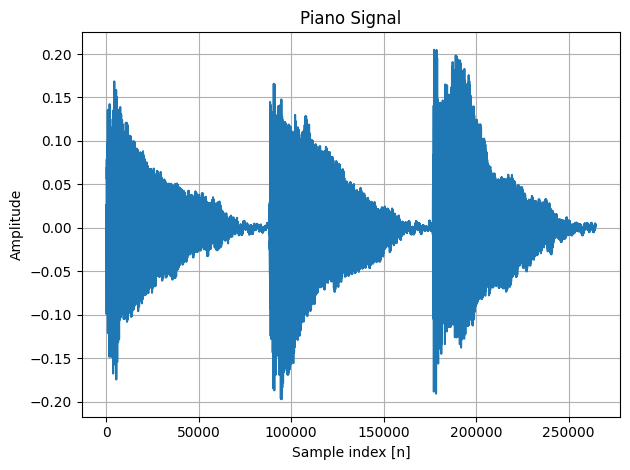

In [25]:
import soundfile as sf
data, fsamp = sf.read('files/piano.wav') 
Tsamp = 1/fsamp

plot_signal(data, title='Piano Signal', xlabel='Sample index [n]', ylabel='Amplitude')
plt.show()

To investigate the second note that was played 2.5 seconds after the start of the recording, we apply a window with the following parameters: 

```python
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
```

We can now extract and plot this windowed data in both time- and frequency-domain using the following function:

In [59]:
from functions.lab_functions import plot_spec_peaks

def plot_piano_note(win_loc_sec, win_size_sec):

    win_loc = int(win_loc_sec/Tsamp)
    win_size = int(win_size_sec/Tsamp)

    x = data[win_loc:win_loc+win_size-1]

    Nsamp = len(x)
    t = np.arange(0, Nsamp*Tsamp, Tsamp)

    # Plot signal (frame)
    title = 'Piano Signal - '+str(win_loc_sec)+'s'
    plot_signal(t, x, title=title, xlabel='Time [s]', ylabel='Amplitude')    
    plt.show()

    X = fft(x)
    f_step = np.arange(0, fsamp, fsamp/Nsamp)

    # Limit spectrum
    f_max = 1000 # Set the upper limit of the spectrum to 20Hz
    f_max_idx = np.argmax(f_step>f_max)
    X = X[0:f_max_idx]
    f_step = f_step[0:f_max_idx]

    # Plot spectrum
    title = 'FFT(Piano Signal) - '+str(win_loc_sec)+'s'
    plot_spec_peaks(f_step, X, title=title)
    plt.savefig('results/ex4/ex4_fft_piano_'+str(win_loc_sec)+'_s.pdf')
    plt.show()

We can now run this fuction to see the plots:

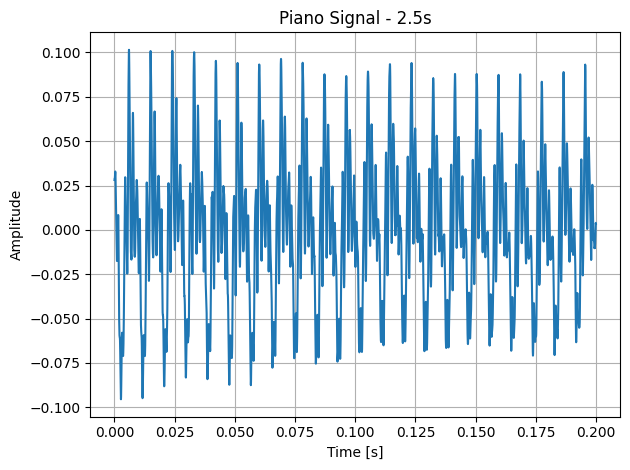

Peaks: 
5.0
25.0
110.0
220.0
330.0
445.1
555.1
665.1
775.1


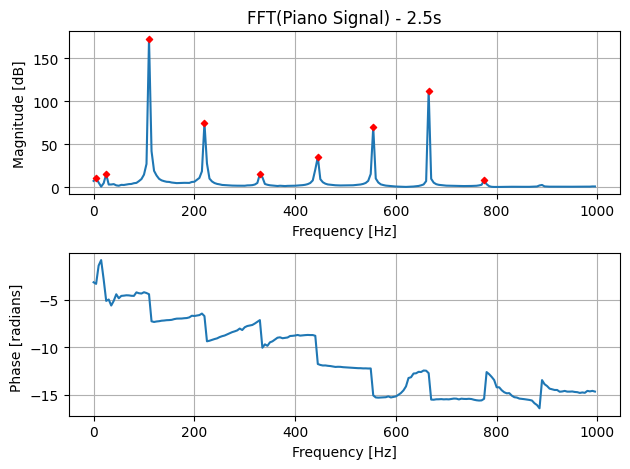

In [27]:
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
plot_piano_note(win_loc_sec, win_size_sec)

**Question 4.18** Analysing the windowed data for the second note, find the frequency of the signal and deduce the musical note being played. For the musical notes, use scientific pitch notation as tabulated here: <https://en.wikipedia.org/wiki/Piano_key_frequencies>.

>**GTA Tip**
>
>Recall what we learned about harmonics from the ECG example. 

> The fundamental frequency will be the largest peak which is at 110Hz. There is only one cycle so no need to divide by anything. Using the table from the link, we can deduce that the note played is A which is the 25th key

**Question 4.19**  See if you can work out the other 2 notes that were played.

>**Hint**: use `winlocsec  = 0.5` (0.5  seconds into the $1\text{st}$ note), `winlocsec  = 2.5` (0.5  seconds  into the $2\text{nd}$ note) and `winlocsec  = 4.5` (0.5  seconds  into the $3\text{rd}$ note) 
